In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("clean_chatgpt_reviews.csv.zip")

# Drop index
data.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'at' to datetime
data['at'] = pd.to_datetime(data['at'], format="%d-%m-%Y %H:%M")

# Optional: Remove extreme thumbs-up outliers for clearer plots
data = data[data['thumbsUpCount'] < 500]

# Set Seaborn style
sns.set(style="whitegrid")


In [9]:
data.head()

,userName,content,score,thumbsUpCount,at
0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,2024-06-28 21:07:00
1,Muhammad bassam adam,perfect,5,0,2024-06-28 20:56:00
2,Chinaza Okoli,its been so helpful...love it,5,0,2024-06-28 20:54:00
3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,2024-06-28 20:51:00
4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,2024-06-28 20:50:00


**Countplot**

/tmp/ipython-input-2481309941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=data, palette='viridis')


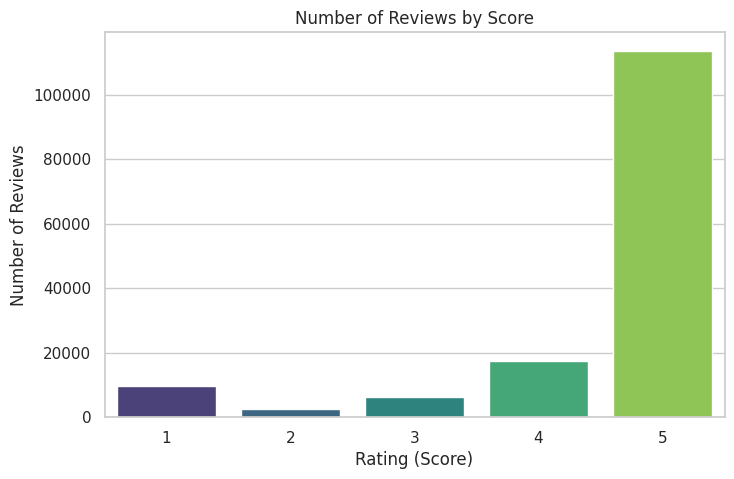

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=data, palette='viridis')
plt.title('Number of Reviews by Score')
plt.xlabel('Rating (Score)')
plt.ylabel('Number of Reviews')
plt.show()


**Violinplot**

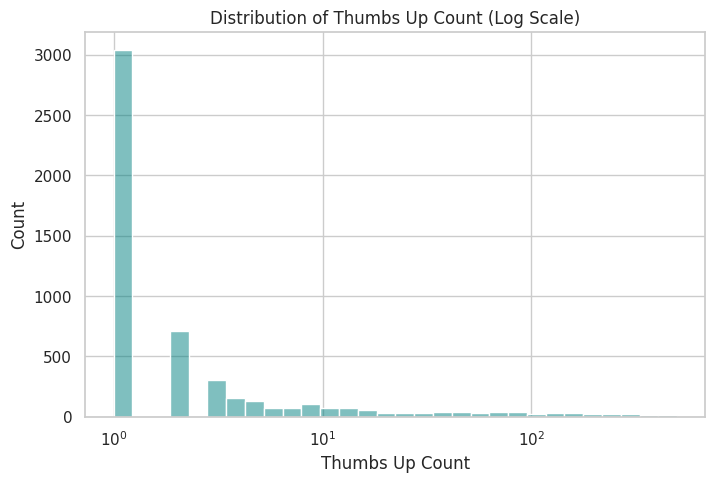

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['thumbsUpCount'], bins=30, log_scale=True, kde=True, color='teal')
plt.title('Distribution of Thumbs Up Count (Log Scale)')
plt.xlabel('Thumbs Up Count')
plt.show()


**Avg thumbs up**

/tmp/ipython-input-2736892734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='thumbsUpCount', data=data, palette='magma')


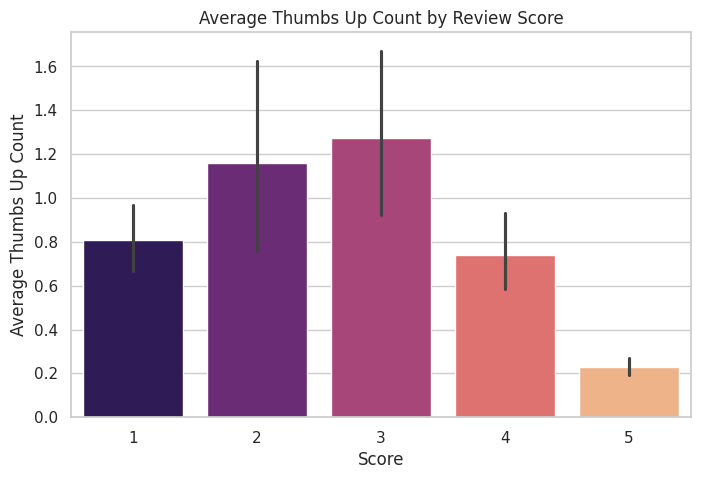

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='thumbsUpCount', data=data, palette='magma')
plt.title('Average Thumbs Up Count by Review Score')
plt.xlabel('Score')
plt.ylabel('Average Thumbs Up Count')
plt.show()


/tmp/ipython-input-1224660897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='thumbsUpCount', data=data, palette='Set2')


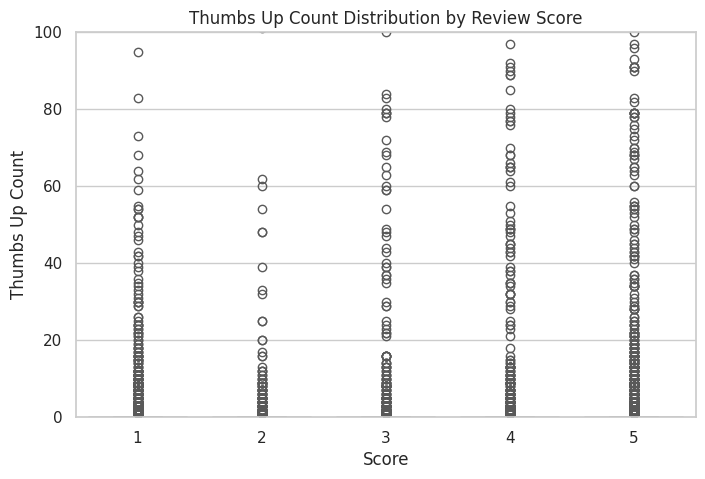

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='score', y='thumbsUpCount', data=data, palette='Set2')
plt.title('Thumbs Up Count Distribution by Review Score')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.ylim(0, 100)  # limit y-axis for clarity
plt.show()


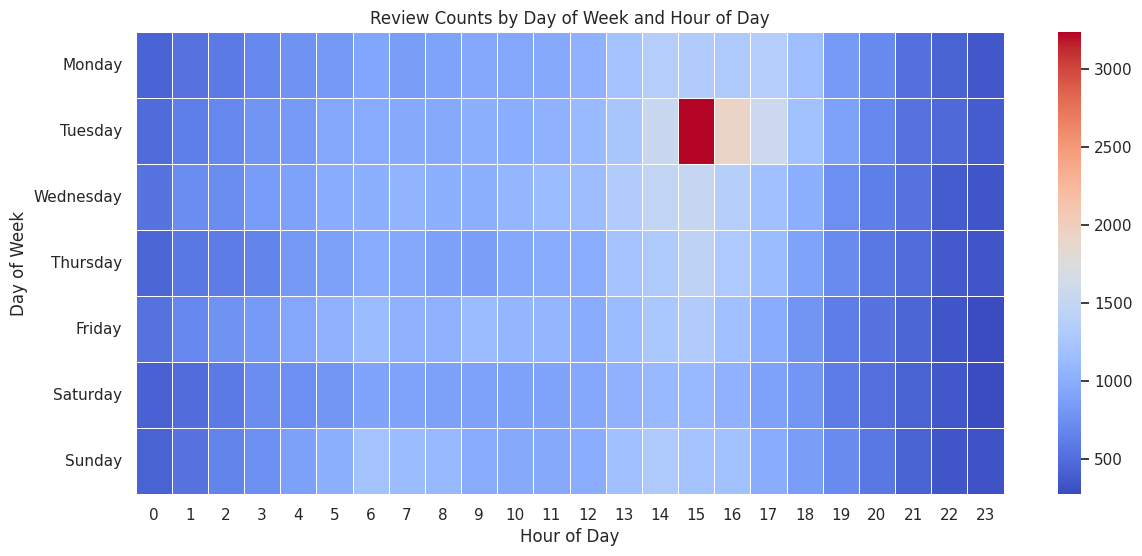

In [22]:
data['day_of_week'] = data['at'].dt.day_name()
data['hour_of_day'] = data['at'].dt.hour

heatmap_data = data.groupby(['day_of_week', 'hour_of_day']).size().unstack(fill_value=0)
# Reorder days for better visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Review Counts by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


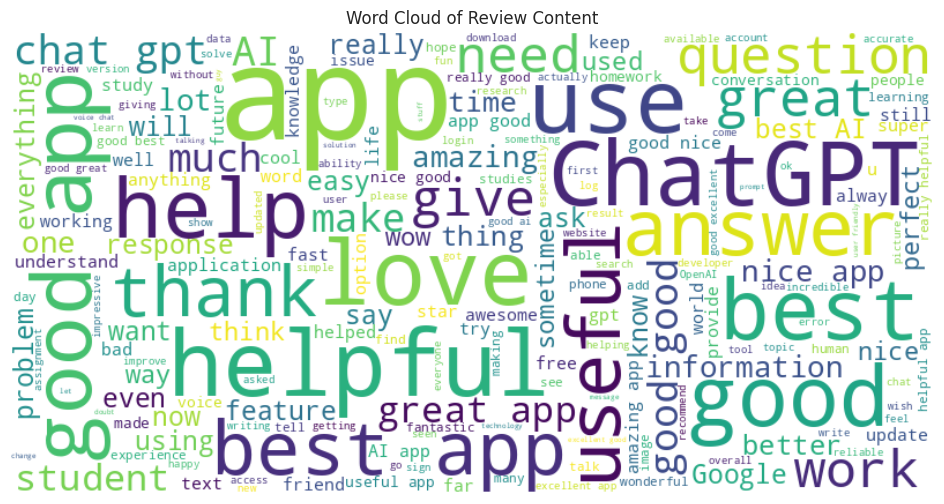